In [42]:
# import tensorboard
from keras.callbacks import TensorBoard
import time

In [5]:
# building the CNN

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Convolution2D

In [8]:
from keras.layers import MaxPooling2D

In [9]:
from keras.layers import Flatten

In [10]:
from keras.layers import Dense

In [11]:
#initializing CNN

In [12]:
classifier = Sequential()

In [13]:
# add convolution layer

In [14]:
# for tf backend
classifier.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [15]:
# 32 feature detectors of shape 3,3

In [16]:
# add pooling layer

In [17]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
# seond conv layer
classifier.add(Convolution2D(32,(3,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [19]:
# flattening

In [20]:
classifier.add(Flatten())

In [21]:
# adding fully connected layer

In [22]:
classifier.add(Dense(output_dim=128,activation='relu'))

/home/tmp/ENTER/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu")`
  if __name__ == '__main__':


In [23]:
classifier.add(Dense(output_dim=1,activation='sigmoid'))

/home/tmp/ENTER/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid")`
  if __name__ == '__main__':


In [24]:
# compiling the CNN

In [25]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# fitting the data

In [27]:
from keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
training_set = train_datagen.flow_from_directory(
        '../instructor/dataset/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


In [31]:
test_set = test_datagen.flow_from_directory(
        '../instructor/dataset/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [48]:
time.time()

1507957368.1148472

In [52]:
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://0.0.0.0:8000')

In [53]:
tboard = TensorBoard(log_dir="./logs/final/{}".format(time.time()), histogram_freq=1, write_graph=True, write_images=True)

classifier.fit_generator( 
        training_set,
        steps_per_epoch=8000/32,
        epochs=10,
        validation_data=test_set,
        validation_steps=2000/32,workers=5,
    callbacks=[tboard,remote]
)

INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/kernel:0 is illegal; using conv2d_1/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_1/bias:0 is illegal; using conv2d_1/bias_0 instead.
INFO:tensorflow:Summary name conv2d_2/kernel:0 is illegal; using conv2d_2/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_2/kernel:0 is illegal; using conv2d_2/kernel_0 instead.
INFO:tensorflow:Summary name conv2d_2/bias:0 is illegal; using conv2d_2/bias_0 instead.
INFO:tensorflow:Summary name conv2d_2/bias:0 is illegal; using conv2d_2/bias_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflo

/home/tmp/ENTER/lib/python3.5/site-packages/keras/callbacks.py:539: UserWarning: Warning: could not reach RemoteMonitor root server at http://0.0.0.0:8000
  'root server at ' + str(self.root))



Epoch 2/10
250/250 [==============================] - 105s - loss: 0.3579 - acc: 0.8376 - val_loss: 0.4572 - val_acc: 0.8045
Epoch 3/10
250/250 [==============================] - 105s - loss: 0.3588 - acc: 0.8411 - val_loss: 0.4174 - val_acc: 0.8115
Epoch 4/10
250/250 [==============================] - 105s - loss: 0.3524 - acc: 0.8420 - val_loss: 0.4612 - val_acc: 0.8100
Epoch 5/10
250/250 [==============================] - 108s - loss: 0.3406 - acc: 0.8483 - val_loss: 0.4591 - val_acc: 0.8100
Epoch 6/10
250/250 [==============================] - 106s - loss: 0.3288 - acc: 0.8559 - val_loss: 0.4505 - val_acc: 0.8196
Epoch 7/10
250/250 [==============================] - 106s - loss: 0.3283 - acc: 0.8534 - val_loss: 0.4331 - val_acc: 0.8190
Epoch 8/10
250/250 [==============================] - 106s - loss: 0.3249 - acc: 0.8539 - val_loss: 0.4447 - val_acc: 0.8205
Epoch 9/10
250/250 [==============================] - 105s - loss: 0.3307 - acc: 0.8541 - val_loss: 0.4180 - val_acc: 0.8215

In [54]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../instructor/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
# for adding another dimension as 
# the model expects input as batch
print(test_image.shape)
test_image = np.expand_dims(test_image, axis=0)
print(test_image.shape)

(64, 64, 3)
(1, 64, 64, 3)


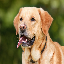

In [59]:
image.load_img('../instructor/dataset/single_prediction/cat_or_dog_1.jpg',target_size=(64,64))

In [55]:
result = classifier.predict(test_image)

In [60]:
result

array([[ 1.]], dtype=float32)

In [61]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:

# have to improve accuracies like this
# https://www.udemy.com/deeplearning/learn/v4/questions/2276518

